### Exercise 2
#### Pattern Recognization and Machine Learning


#### Task 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a) Create a vector of zero and sinusoidal components that looks like the plot
below. Commands: np.zeros, np.concatenate. Sinusoid is generated
by np.cos(2 * np.pi * 0.1 * n).

In [2]:
a = np.zeros(500);
n= np.arange(100);
b = np.cos(2 * np.pi * 0.1 * n);
c = np.zeros(300)

y = np.concatenate((a,b,c));


b) Create a noisy version of the signal by adding Gaussian noise with variance
0.5: y_n = y + np.sqrt(0.5) * np.random.randn(y.size).

In [3]:
y_n = y + np.sqrt(0.5) * np.random.randn(y.size);

c) Implement the deterministic sinusoid detector

In [4]:
ds = np.exp(-2 * np.pi * 1j * 0.1 * n);

d) Implement the random signal version (slide 24 of slideset 3).

In [5]:
rn =  np.abs(np.convolve(ds, y_n, 'same'));
rn1 =  np.convolve(b, y_n, 'same');

e) Generating Plots

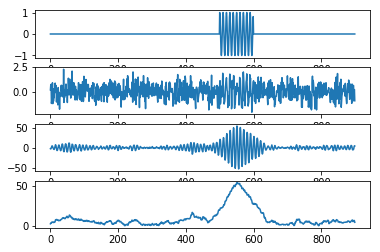

In [6]:
fig, ax = plt.subplots(4, 1) # Create a figure with 4 axes

ax[0].plot(y) # This will be the topmost axis
ax[1].plot(y_n) # This will be the second axis
ax[2].plot(rn1) # This will be the 3rd axis
ax[3].plot(rn) # This will be the 4th axis


plt.show() # Display on screen

### Task 5

#### Train your first sklearn classifiers.
In this exercise we will train a two classifiers and compare their performance.
Before you start, load the following dataset:


a) Load the file twoClassData.mat to your python workspace.

In [7]:
from scipy.io import loadmat

mat = loadmat("twoClassData.mat");

b) Split the data into training and testing sets: samples X[:200] are for training
and X[200:] for testing.


In [8]:
from sklearn.model_selection import train_test_split

X = mat["X"] #array of ones and zerros
y = mat["y"].ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

c) Train a KNN classifier. Use default parameters and compute the accuracy
using sklearn.metrics.accuracy_score on the test set.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as acc

neigh = KNeighborsClassifier(n_neighbors=3);
neigh.fit(X_train, y_train);

knnPredict = neigh.predict(X_test);

accuracy = acc(knnPredict, y_test);
print("KNN Accuracy: ", accuracy);

KNN Accuracy:  0.865


d) Train an LDA classifier. Use default parameters and compute the accuracy
using sklearn.metrics.accuracy_score on the test set.

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDAclassifier = LinearDiscriminantAnalysis()
LDAclassifier.fit(X_train, y_train)
LDA_pred = LDAclassifier.predict(X_test)

LDA = acc(y_test, LDA_pred)
print("LDA accuracy",LDA)

LDA accuracy 0.885
